In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

pd.set_option('display.max_columns', None)

In [2]:
DATA_PATH = r'data_final_ready.csv'

In [3]:
df = pd.read_csv(DATA_PATH)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16454 entries, 0 to 16453
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             16452 non-null  float64
 1   height                          16453 non-null  float64
 2   nationality                     16216 non-null  object 
 3   position                        16451 non-null  object 
 4   position_category               16454 non-null  object 
 5   current_club                    16454 non-null  object 
 6   league                          16454 non-null  object 
 7   appearances                     16454 non-null  int64  
 8   minutes_played                  16454 non-null  int64  
 9   is_GK                           16454 non-null  int64  
 10  is_DF                           16454 non-null  int64  
 11  is_MF                           16454 non-null  int64  
 12  is_FW                           

In [6]:
print(df['position_category'].value_counts())

position_category
MF         6706
DF         5897
FW         2371
GK         1477
UNKNOWN       3
Name: count, dtype: int64


In [8]:
df.groupby('position_category')['market_value'].describe()

,count,mean,std,min,25%,50%,75%,max
position_category,,,,,,,,
DF,5897.0,3.174476,8.538011,0.01,0.250,0.6,2.00,140.0
FW,2371.0,2.705038,8.423822,0.01,0.200,0.5,1.50,140.0
GK,1477.0,2.034408,5.849736,0.01,0.125,0.3,1.00,80.0
MF,6706.0,3.965687,11.457767,0.01,0.300,0.7,2.50,200.0
UNKNOWN,3.0,0.983333,0.977667,0.05,0.475,0.9,1.45,2.0


In [18]:
df_fw = df[df['is_FW'] == 1]

In [19]:
df_fw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2371 entries, 1 to 16445
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             2371 non-null   float64
 1   height                          2371 non-null   float64
 2   nationality                     2318 non-null   object 
 3   position                        2371 non-null   object 
 4   position_category               2371 non-null   object 
 5   current_club                    2371 non-null   object 
 6   league                          2371 non-null   object 
 7   appearances                     2371 non-null   int64  
 8   minutes_played                  2371 non-null   int64  
 9   is_GK                           2371 non-null   int64  
 10  is_DF                           2371 non-null   int64  
 11  is_MF                           2371 non-null   int64  
 12  is_FW                           2371 n

In [ ]:
# df['goals_x_assists'] = df['goals'] * df['assists']
# df['age_height'] = df['age'] * df['height']
# df['xg_per_shot'] = df['xg_per90'] / (df['shots_per90'] + 1e-6)
# df['goals_per_shot'] = df['goals'] / (df['shots_per90'] + 1e-6)
# df['assists_per_takeon'] = df['assists'] / (df['take_ons_per90'] + 1e-6)

In [ ]:
info_columns = ['height', 'position', 'nationality', 'current_club', 'league', 
                'appearances', 'minutes_played','age_group', 'experience_level']
TARGET = 'market_value'

In [37]:
fw_cols = [
    'goals_per_90', 'npg_per90', 'npxg_per90',
    'xag_per90',

    'shots_per90', 'shots_on_target_per90',
    'shots_on_target_pct', 'avg_shot_distance',
    'shooting_efficiency',
    
    'assists_per_90',

    'sca_per90', 'gca_per90', 'key_passes_per90',

    'passes_completed_per90','passes_into_final_third_per90',
    'passes_into_penalty_area_per90', 'progressive_passes_per90',
    'is_high_passer',

    'progressive_carries_per90', 'take_ons_per90',
    'take_on_success_pct', 'touches_att_third_per90',
    'touches_att_pen_per90'

    ]

fw_cols = info_columns + fw_cols  + [TARGET]

In [38]:
df_fw_selected = df_fw[fw_cols]

In [57]:
df_fw_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
appearances,2371.0,15.460565,10.691829,0.00,6.00000,14.000000,24.000000,48.00
minutes_played,2371.0,795.388865,761.861202,0.00,142.00000,565.000000,1250.500000,4026.00
goals_per_90,2371.0,0.383159,0.380348,0.00,0.25000,0.340000,0.430000,12.86
npg_per90,2371.0,0.258777,0.154007,0.00,0.25000,0.250000,0.250000,1.89
npxg_per90,2371.0,0.290346,0.112425,0.00,0.28000,0.280000,0.290000,1.27
xag_per90,2371.0,0.090430,0.052649,0.00,0.08000,0.080000,0.090000,0.62
shots_per90,2371.0,2.269610,0.607033,0.00,2.24500,2.255000,2.270000,7.10
shots_on_target_per90,2371.0,0.819958,0.309358,0.00,0.80000,0.800000,0.800000,4.11
shots_on_target_pct,2371.0,36.427035,9.802507,0.00,36.40000,36.400000,36.400000,100.00
avg_shot_distance,2371.0,14.891523,2.360716,4.00,14.70000,14.700000,14.700000,40.30


In [ ]:
num_cols = df_fw_selected.select_dtypes(include=[np.number]).columns.tolist()


for c in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df_fw[c].dropna(), kde=True)
    plt.title(f'Distribution of {c}')
    plt.tight_layout()
    plt.show()

corr = df_fw_selected[num_cols].corr()

# Tạo mask tam giác trên
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True
)
plt.title('Numeric features correlation')
plt.show()

In [66]:
X_fw = df_fw_selected.drop(columns=[TARGET])
y_fw = df_fw_selected[TARGET]

In [67]:
bins = pd.qcut(np.log1p(y_fw), q=10, labels=False, duplicates='drop')
X_fw_train, X_fw_test, y_fw_train, y_fw_test = train_test_split(X_fw, y_fw, test_size = 0.2, random_state=42, stratify=bins)

<Axes: >

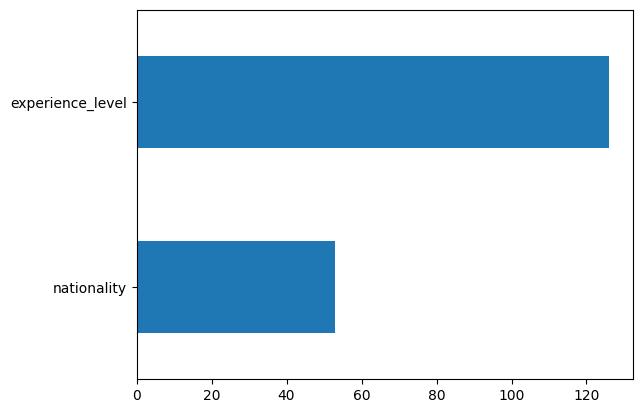

In [68]:
fw_missing = df_fw_selected.isna().sum()
fw_missing= fw_missing[fw_missing > 0].sort_values()

fw_missing.plot(kind='barh')

In [69]:
num_cols = X_fw_train.select_dtypes(include=[np.number]).columns.tolist()

In [70]:
cat_cols = X_fw_train.select_dtypes(exclude=[np.number]).columns.tolist()

In [71]:
nationality_missing_fill = X_fw_train['nationality'].mode()[0]
X_fw_train['nationality'] = X_fw_train['nationality'].fillna(nationality_missing_fill)
X_fw_test['nationality'] = X_fw_test['nationality'].fillna(nationality_missing_fill)

In [72]:
X_fw_train['experience_level'] = X_fw_train['experience_level'].fillna(0)
X_fw_test['experience_level'] = X_fw_test['experience_level'].fillna(0)

In [73]:
X_fw_train = pd.get_dummies(X_fw_train, columns=cat_cols, drop_first=True)
X_fw_test = pd.get_dummies(X_fw_test, columns=cat_cols, drop_first=True)
X_fw_test = X_fw_test.reindex(columns=X_fw_train.columns, fill_value=0)

In [74]:
gb_model = GradientBoostingRegressor(random_state=42)

In [75]:
y_fw_train_log = np.log1p(y_fw_train)
y_fw_test_log = np.log1p(y_fw_test)

In [76]:
gb_model.fit(X_fw_train, y_fw_train_log)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [77]:
y_fw_pred_log = gb_model.predict(X_fw_test)
y_fw_pred = np.expm1(y_fw_pred_log)
mae = mean_absolute_error(y_fw_test, y_fw_pred)
rmse = root_mean_squared_error(y_fw_test, y_fw_pred)
r2 = r2_score(y_fw_test, y_fw_pred)

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'r2_score: {r2:.4f}')

MAE: 2.2614
RMSE: 8.8349
r2_score: 0.3569


In [86]:
param_dist = {
    'n_estimators': randint(200, 600),
    'learning_rate': uniform(0.03, 0.1),
    'max_depth': randint(2, 4),
    'min_samples_leaf': randint(10, 40),
    'subsample': uniform(0.7, 0.3),
    'max_features': ['sqrt', None],
    'loss': ['squared_error', 'huber']
}

In [ ]:
fw_random_search = RandomizedSearchCV(
    GradientBoostingRegressor(
        random_state=42
    ),
    param_distributions=param_dist,
    n_iter=50,       
    cv=3,            
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)


In [ ]:
fw_random_search.fit(X_fw_train, y_fw_train_log)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


,estimator,GradientBoost...ndom_state=42)
,param_distributions,"{'learning_rate': <scipy.stats....00250F99355B0>, 'loss': ['squared_error', 'huber'], 'max_depth': <scipy.stats....00250F982E690>, 'max_features': ['sqrt', None], ...}"
,n_iter,50
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [89]:
best_model = fw_random_search.best_estimator_

In [90]:
y_fw_test_pred_log = best_model.predict(X_fw_test)
y_fw_test_pred = np.expm1(y_fw_test_pred_log)

In [91]:
mae = mean_absolute_error(y_fw_test, y_fw_test_pred)
rmse = root_mean_squared_error(y_fw_test, y_fw_test_pred)
r2 = r2_score(y_fw_test, y_fw_pred)

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'r2_score: {r2:.4f}')

MAE: 2.0985
RMSE: 8.4395
r2_score: 0.3569


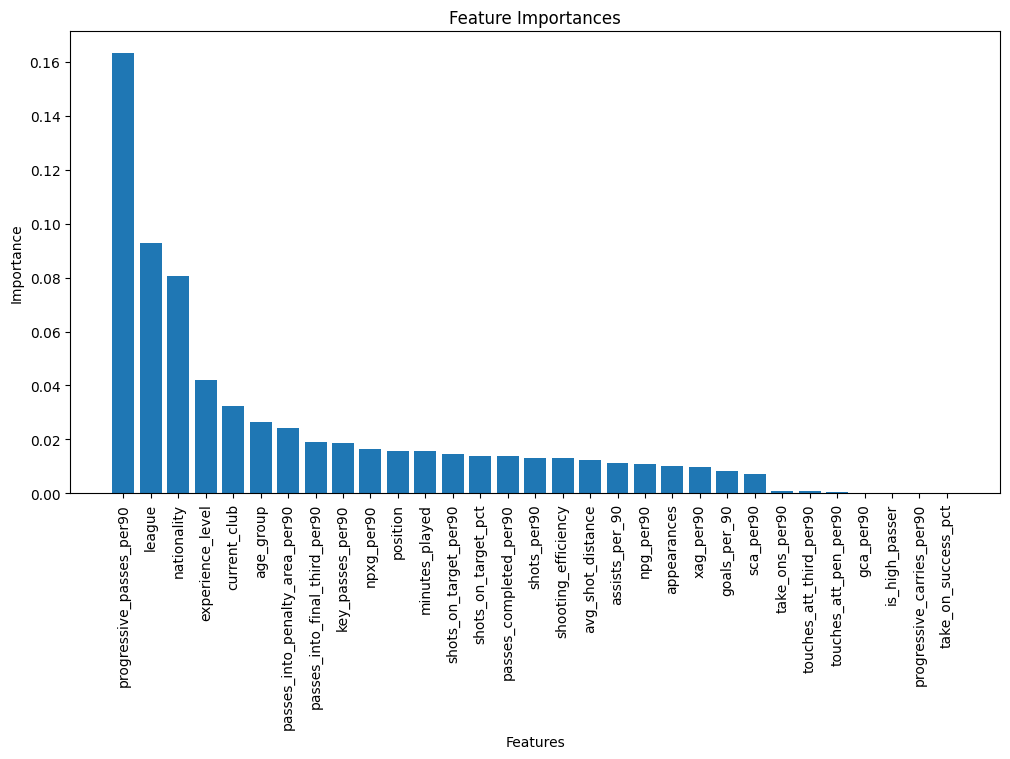

In [92]:
features, importances = zip(*sorted(
    zip(X_fw.columns, best_model.feature_importances_),
    key=lambda x: x[1],
    reverse=True
))

# Vẽ bar chart
plt.figure(figsize=(12,6))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

In [94]:
mf_cols = [
    'goals_per_90', 'npg_per90', 'npxg_per90',
    'xag_per90',

    'shots_per90', 'shots_on_target_per90',
    'shots_on_target_pct', 'avg_shot_distance',
    
    'assists_per_90',

    'sca_per90', 'gca_per90', 'key_passes_per90',

    'passes_completed_per90','passes_into_final_third_per90',
    'passes_into_penalty_area_per90', 'progressive_passes_per90',
    'is_high_passer',

    'progressive_carries_per90', 'take_ons_per90',
    'take_on_success_pct', 'touches_att_third_per90',
    
    'tackles_per90', 'interceptions_per90', 'blocks_per90',
    'ball_recoveries_per90'
]

mf_cols = info_columns + mf_cols + [TARGET]

In [93]:
df_mf = df[df['is_MF'] == 1]

In [95]:
df_mf_selected =  df_mf[mf_cols]

In [96]:
df_mf_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6706 entries, 5 to 16453
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   position                        6706 non-null   object 
 1   nationality                     6619 non-null   object 
 2   current_club                    6706 non-null   object 
 3   league                          6706 non-null   object 
 4   appearances                     6706 non-null   int64  
 5   minutes_played                  6706 non-null   int64  
 6   age_group                       6706 non-null   object 
 7   experience_level                6421 non-null   object 
 8   goals_per_90                    6706 non-null   float64
 9   npg_per90                       6706 non-null   float64
 10  npxg_per90                      6706 non-null   float64
 11  xag_per90                       6706 non-null   float64
 12  shots_per90                     6706 n

In [ ]:
num_cols = df_mf_selected.select_dtypes(include=[np.number]).columns.tolist()


for c in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df_fw[c].dropna(), kde=True)
    plt.title(f'Distribution of {c}')
    plt.tight_layout()
    plt.show()

corr = df_mf_selected[num_cols].corr()

# Tạo mask tam giác trên
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True
)
plt.title('Numeric features correlation')
plt.show()

In [127]:
X_mf = df_mf_selected.drop(columns=[TARGET])
y_mf = df_mf_selected[TARGET]

In [128]:
bins = pd.qcut(np.log1p(y_mf), q=10, labels=False, duplicates='drop')
X_mf_train, X_mf_test, y_mf_train, y_mf_test = train_test_split(X_mf, y_mf, test_size = 0.2, random_state=42, stratify=bins)

In [129]:
num_cols = X_mf_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_mf_train.select_dtypes(exclude=[np.number]).columns.tolist()

<Axes: >

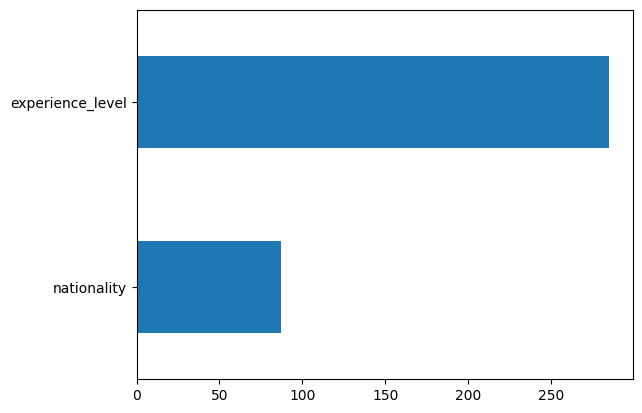

In [130]:
mf_missing = df_mf_selected.isna().sum()
mf_missing= mf_missing[mf_missing > 0].sort_values()

mf_missing.plot(kind='barh')

In [131]:
nationality_missing_fill = X_mf_train['nationality'].mode()[0]
X_mf_train['nationality'] = X_mf_train['nationality'].fillna(nationality_missing_fill)
X_mf_test['nationality'] = X_mf_test['nationality'].fillna(nationality_missing_fill)

In [132]:
X_mf_train['experience_level'] = X_mf_train['experience_level'].fillna(0)
X_mf_test['experience_level'] = X_mf_test['experience_level'].fillna(0)

In [133]:
X_mf_train = pd.get_dummies(X_mf_train, columns=cat_cols, drop_first=True)
X_mf_test = pd.get_dummies(X_mf_test, columns=cat_cols, drop_first=True)
X_mf_test = X_mf_test.reindex(columns=X_mf_train.columns, fill_value=0)

In [134]:
gb_model = GradientBoostingRegressor(random_state=42)

In [135]:
y_mf_train_log = np.log1p(y_mf_train)
y_mf_test_log = np.log1p(y_mf_test)

In [136]:
gb_model.fit(X_mf_train, y_mf_train_log)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [137]:
y_mf_pred_log = gb_model.predict(X_mf_test)
y_mf_pred = np.expm1(y_mf_pred_log)
mae = mean_absolute_error(y_mf_test, y_mf_pred)
rmse = root_mean_squared_error(y_mf_test, y_mf_pred)
r2 = r2_score(y_mf_test, y_mf_pred)

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'r2_score: {r2:.4f}')

MAE: 2.3062
RMSE: 6.6944
r2_score: 0.5051


In [138]:
param_dist = {
    'n_estimators': randint(200, 600),
    'learning_rate': uniform(0.03, 0.1),
    'max_depth': randint(2, 4),
    'min_samples_leaf': randint(10, 40),
    'subsample': uniform(0.7, 0.3),
    'max_features': ['sqrt', None],
    'loss': ['squared_error', 'huber']
}

In [145]:
mf_random_search = RandomizedSearchCV(
    GradientBoostingRegressor(
        random_state=42
    ),
    param_distributions=param_dist,
    n_iter=50,       
    cv=3,            
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)


In [146]:
mf_random_search.fit(X_mf_train, y_mf_train_log)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


,estimator,GradientBoost...ndom_state=42)
,param_distributions,"{'learning_rate': <scipy.stats....0025083979150>, 'loss': ['squared_error', 'huber'], 'max_depth': <scipy.stats....00250FBF07200>, 'max_features': ['sqrt', None], ...}"
,n_iter,50
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [147]:
best_model = mf_random_search.best_estimator_

y_mf_test_pred_log = best_model.predict(X_mf_test)
y_mf_test_pred = np.expm1(y_mf_test_pred_log)

mae = mean_absolute_error(y_mf_test, y_mf_test_pred)
rmse = root_mean_squared_error(y_mf_test, y_mf_test_pred)
r2 = r2_score(y_mf_test, y_mf_pred)

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'r2_score: {r2:.4f}')

MAE: 2.1335
RMSE: 6.1468
r2_score: 0.5051


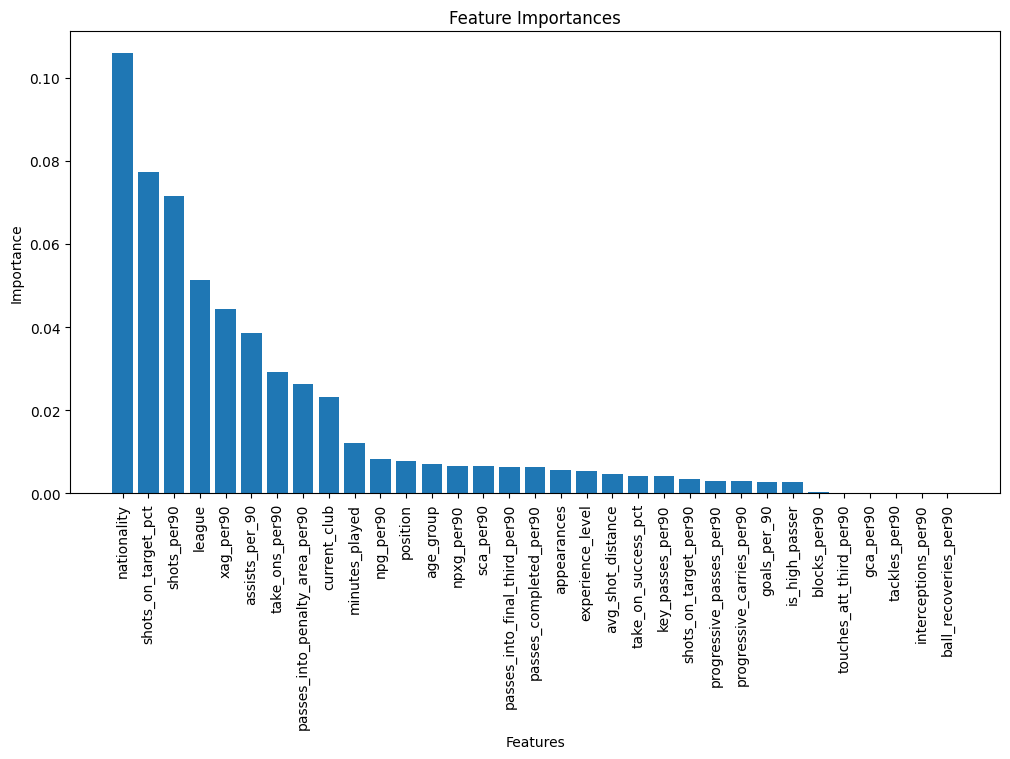

In [148]:
features, importances = zip(*sorted(
    zip(X_mf.columns, best_model.feature_importances_),
    key=lambda x: x[1],
    reverse=True
))

# Vẽ bar chart
plt.figure(figsize=(12,6))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

In [ ]:
df_cols = [

     # Phòng ngự
    'tackles_per90', 'interceptions_per90',
    'blocks_per90', 'ball_recoveries_per90',

    # Không chiến
    'aerials_won_per90', 'aerial_win_pct',

    # Build-up
    'passes_completed_per90', 'pass_completion_pct',
    'progressive_passes_per90',
    'passes_into_final_third_per90',

    # Hỗ trợ tấn công (FB/WB)
    'progressive_carries_per90',
    'carries_into_final_third_per90',
    'key_passes_per90',
    'xag_per90',

    # Kỷ luật
    'fouls_committed_per90',
    'yellow_cards_per90', 'red_cards_per90'
]

df_cols = info_columns + df_cols + [TARGET]

In [ ]:
gk_cols = [

     # ===== CHỈ SỐ THỦ MÔN – CẢN PHÁ =====
    'goals_against_per90',
    'shots_on_target_against_per90',
    'saves_per90',
    'save_percentage'
    'clean_sheet_pct',
    'psxg_per_shot',
    'psxg_ga_per90',
    'penalty_save_pct',

    # ===== CHỈ SỐ THỦ MÔN – PHÁT BÓNG & CHUYỀN BÓNG =====
    'passes_attempted_per90',
    'launch_pct',
    'avg_pass_length',

    # ===== CHỈ SỐ THỦ MÔN – QUÉT BÓNG =====
    'def_actions_outside_pen_per90',
    'avg_distance_def_actions',

    # ===== CHỈ SỐ THỦ MÔN – CHỐNG BÓNG BỔNG =====
    'crosses_stopped_pct',

    # ===== CHỈ SỐ KẾT QUẢ TRẬN ĐẤU =====
    'wins_per90',
    'draws_per90',
    'losses_per90',
]

gk_cols = info_columns + gk_cols + [TARGET]